<a href="https://colab.research.google.com/github/Putranto13/Tugas_Machine_Learning/blob/main/Week9_3_2_Linear_Regression_Implementation_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install d2l==0.17.0

     |████████████████████████████████| 83 kB 1.2 MB/s 


In [3]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

In [4]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([ 1.3467432 -1.0037799], shape=(2,), dtype=float32) 
label: tf.Tensor([10.307374], shape=(1,), dtype=float32)


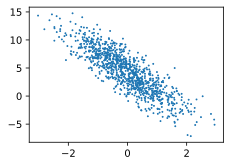

In [6]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 1.0397816  -0.23636062]
 [-1.1889927   0.14762959]
 [ 0.11413025 -1.2859472 ]
 [ 1.0220797  -1.6177425 ]
 [ 0.17960407 -2.6382685 ]
 [-0.43071246  2.340308  ]
 [-0.20556885  0.39004242]
 [-0.29061282  0.14745279]
 [-1.4404182   0.5921245 ]
 [-0.7282622   0.3592903 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 7.094037  ]
 [ 1.3301599 ]
 [ 8.788568  ]
 [11.755666  ]
 [13.512225  ]
 [-4.632182  ]
 [ 2.4532268 ]
 [ 3.1215808 ]
 [-0.71666634]
 [ 1.5343976 ]], shape=(10, 1), dtype=float32)


In [9]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [10]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return tf.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [12]:
def sgd(params, grads, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [13]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.035057
epoch 2, loss 0.000126
epoch 3, loss 0.000047


In [14]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [0.0004611  0.00020623]
error in estimating b: [0.00028944]
